In [17]:
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime

file_name = '20231120-17-01_1e6.npz'

# interesting one: 20231120-16-17_runs1e6_INTERESTING_MEANU.npz

current_dir = os.getcwd()
new_dir = f'{current_dir}/'
file_dir = f'{new_dir}{file_name}'

npzfile = np.load(file_dir)

keys = npzfile.files
for key in keys:
    locals()[key] = npzfile[key]
# print('keys:',keys)    
# keys: ['T', 'eps', 'Tcell_num', 'B_num', 'size', 'E_mean', 'E_variance', 'num_runs']

E_var = E_variance
T_num = Tcell_num

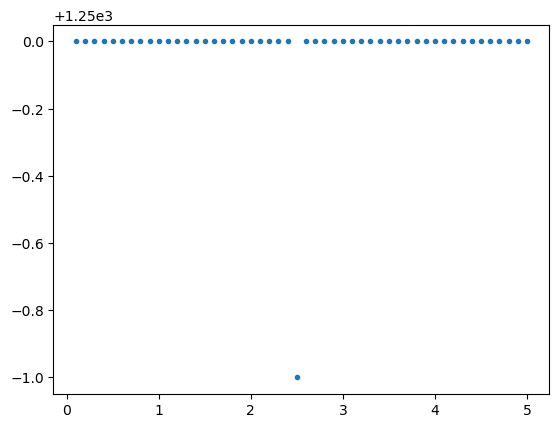

In [23]:
plt.figure()
plt.plot(T,B_num,'.')
plt.show()

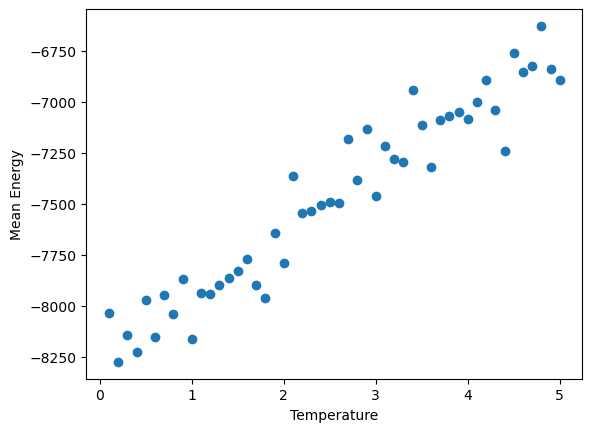

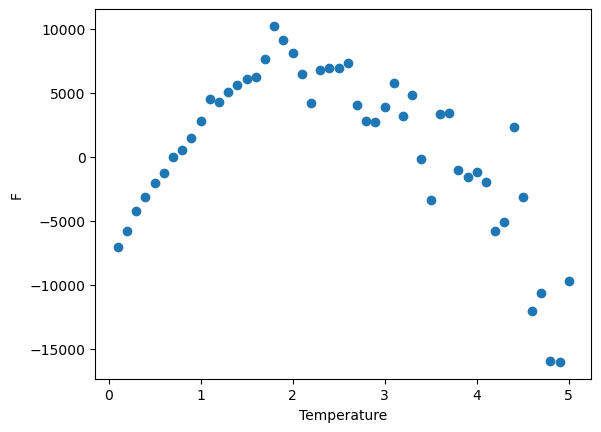

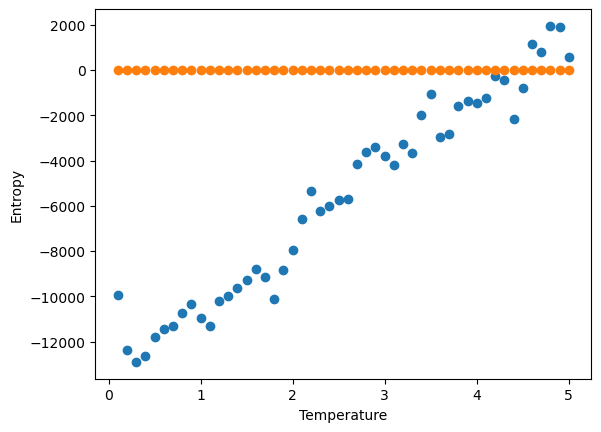

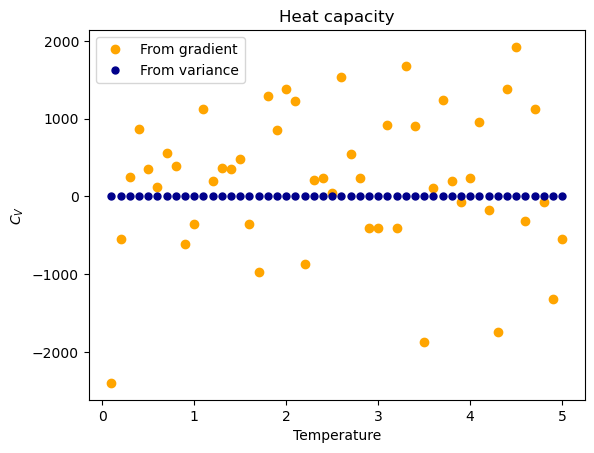

In [18]:
def stirling(x):
    res = x*np.log(x)-x
    return res

def multiplicity(size, B_num):
    N = size**2
    multiplicity = stirling(N)-stirling(B_num)-stirling(N-B_num)
    
    #num_particles = N
    return multiplicity

def the_physics(T, E_mean, E_var, M):
     
    S_ref = np.log(M)   
    Cv_gradient = np.gradient(E_mean,T)
    
    Cv_variance = np.zeros([len(T)])
    for i in range(len(T)):
        Cv_variance[i] = E_var[i]/T[i]**2
            
    Sgrad = S_ref - np.cumsum(Cv_gradient)
    Svar = S_ref - np.cumsum(Cv_variance)
    F = E_mean - T*Sgrad
    
    return Cv_gradient, Cv_variance, Sgrad, Svar, F

M = multiplicity(size, B_num)
Cv_grad, Cv_var, Sgrad, Svar, F =the_physics(T, E_mean, E_var, M) 

# FIGURES 

# Mean Energy
plt.figure()
plt.plot(T,E_mean,'o')
plt.xlabel('Temperature')
plt.ylabel('Mean Energy')
#plt.title(f'Mean Energy, T_num: {Tcell_num}, B_num: {Bacteria_num}')
#plt.savefig(f'Runs_data/{datetime_str}U_mean.pdf', format = 'pdf')
plt.show()


# Helmholtz Free Energy
plt.figure()
plt.plot(T,F,'o')
plt.xlabel('Temperature')
plt.ylabel('F')
#plt.title('Helmholtz Free Energy')
plt.show()

plt.figure()
plt.plot(T,Sgrad,'o', label = 'from variance' )
plt.plot(T,Svar,'o', label = 'from gradient' )
plt.xlabel('Temperature')
plt.ylabel('Entropy')
#plt.title('Entropy')
plt.show()

# Heat capacity   
plt.figure()
plt.plot(T,Cv_grad,'o', color = 'orange', label = 'From gradient')
plt.plot(T,Cv_var, '.', markersize = '10', color = 'darkblue', label = 'From variance')
plt.xlabel('Temperature')
plt.ylabel('$C_{V}$')
plt.title(f'Heat capacity')
plt.legend()
#plt.savefig(f'Runs_data/{datetime_str}Cv.png')
plt.show()

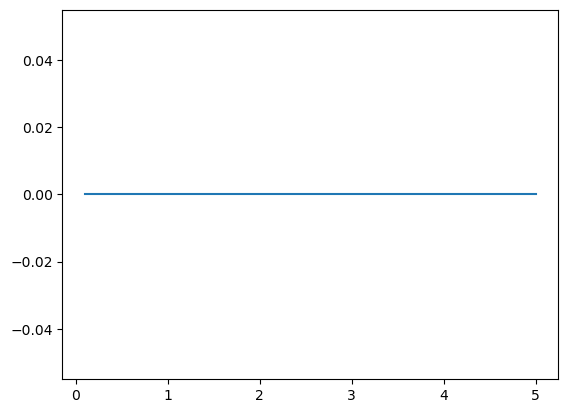

In [19]:
plt.figure()
plt.plot(T,E_var)
plt.show()